In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
dataset = pd.read_csv("cardio_train.csv", sep=";")

In [32]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [33]:
dataset.set_index('id', inplace=True)
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [34]:
dataset.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [35]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = ['cardio']

In [36]:
categorical_features = ['gender', 'cholesterol', 'gluc']

In [37]:
dataset = pd.get_dummies(dataset, columns=categorical_features, prefix=categorical_features)

In [38]:
dataset.head()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,168,62.0,110,80,0,0,1,0,0,1,1,0,0,1,0,0
1,20228,156,85.0,140,90,0,0,1,1,1,0,0,0,1,1,0,0
2,18857,165,64.0,130,70,0,0,0,1,1,0,0,0,1,1,0,0
3,17623,169,82.0,150,100,0,0,1,1,0,1,1,0,0,1,0,0
4,17474,156,56.0,100,60,0,0,0,0,1,0,1,0,0,1,0,0


In [39]:
X = dataset.drop(target, axis=1)
y = dataset[target].values.ravel()

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X.astype(float), y, test_size=0.3, random_state=43)

# Perceptron

In [61]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Perceptron with standard scaler
std_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(max_iter=8000, tol=1e-3, early_stopping=True, alpha=0.0001, n_jobs=-1))
])

std_perceptron.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_perceptron.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_perceptron.score(X_val, y_val)*100))

Accuracy on train 66.27%
Accuracy on val 66.01%


In [66]:
from sklearn.preprocessing import PolynomialFeatures

poly_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('perceptron', Perceptron(max_iter=8000, tol=1e-3, early_stopping=True, alpha=0.0001, n_jobs=-1))
])

poly_perceptron.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(poly_perceptron.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(poly_perceptron.score(X_val, y_val)*100))

Accuracy on train 65.40%
Accuracy on val 65.20%


# Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_lr = Pipeline([
    ('std', StandardScaler()),
    ('lr', LogisticRegression(penalty='l2', solver='lbfgs', tol=1e-2, C=1, random_state=43, multi_class='ovr', n_jobs=-1))
])

std_lr.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_lr.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_lr.score(X_val, y_val)*100))

Accuracy on train 71.92%
Accuracy on val 71.55%


# Gaussian Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_gnb = Pipeline([
    ('std', StandardScaler()),
    ('gnb', GaussianNB(var_smoothing=0.001))
])

std_gnb.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_gnb.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_gnb.score(X_val, y_val)*100))

Accuracy on train 59.94%
Accuracy on val 59.68%


# K Nearest Neighbour

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_knn = Pipeline([
    ('std', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=15, leaf_size=70, algorithm='auto', n_jobs=-1))
])

std_knn.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_knn.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_knn.score(X_val, y_val)*100))

Accuracy on train 71.34%
Accuracy on val 66.13%


# SVM

In [107]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_svm = Pipeline([
    ('std', StandardScaler()),
    ('svm', SVC(gamma='auto', kernel='rbf'))
])

std_svm.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_svm.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_svm.score(X_val, y_val)*100))

Accuracy on train 73.06%
Accuracy on val 72.18%


# XGBoost

In [135]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_xgb = Pipeline([
    ('std', StandardScaler()),
    ('svm', XGBClassifier(nthread=8, n_estimators=1000, objective='binary:logistic', early_stopping_rounds=10, eta=0.5, min_child_weight=3))
])

std_xgb.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_xgb.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_xgb.score(X_val, y_val)*100))

Accuracy on train 75.12%
Accuracy on val 73.50%


# NN

In [139]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.ylim([0,2])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
    plt.ylim([0.4, 1])
    plt.legend()
    plt.show()

In [148]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv1D

scaler_X = StandardScaler()
std_X_train = scaler_X.fit_transform(X_train.astype(float))
std_X_val = scaler_X.transform(X_val)

std_y_train = to_categorical(y_train)
std_y_val = to_categorical(y_val)

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

def nn_build_model():
    model = Sequential([
        Conv1D(16, 15, input_shape=(10, X_train.shape[1])),
        #Dense(128, input_shape=[X_train.shape[1]]),
        Dense(128, activation=tf.nn.relu),
        Dense(68, activation=tf.nn.relu),
        Dense(2, activation=tf.nn.softmax)
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [149]:
model = nn_build_model()
history = model.fit(std_X_train, std_y_train, validation_split=0.2, epochs=30, verbose=0, callbacks=[PrintDot()])


..............................

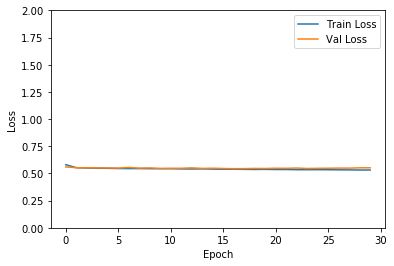

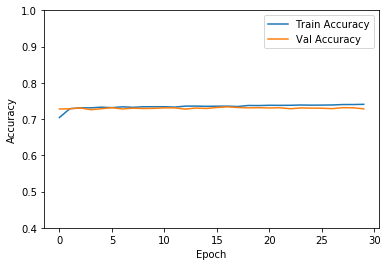

In [150]:
hist = pd.DataFrame(history.history)
plot_history(history)

In [151]:
print(hist)

        loss       acc  val_loss   val_acc
0   0.580573  0.704286  0.559982  0.727857
1   0.552884  0.728827  0.552704  0.728367
2   0.549687  0.731097  0.551666  0.730612
3   0.548036  0.731020  0.551219  0.725918
4   0.547195  0.732781  0.550476  0.728571
5   0.545259  0.731633  0.548929  0.731429
6   0.544717  0.733827  0.554874  0.727959
7   0.544687  0.732398  0.548702  0.730102
8   0.543815  0.733980  0.550696  0.729184
9   0.543534  0.734031  0.545966  0.729592
10  0.543159  0.734082  0.547461  0.730918
11  0.541765  0.733036  0.547293  0.730918
12  0.540674  0.735791  0.551282  0.727551
13  0.542157  0.735867  0.546172  0.730408
14  0.540244  0.735179  0.547811  0.729286
15  0.539049  0.735561  0.545521  0.731939
16  0.538758  0.735714  0.543507  0.733775
17  0.537571  0.734668  0.544421  0.731939
18  0.536690  0.737551  0.546050  0.731020
19  0.537477  0.737321  0.545402  0.731429
20  0.536146  0.738061  0.547690  0.730714
21  0.536125  0.737883  0.547057  0.731224
22  0.53452